<a href="https://colab.research.google.com/github/djDongjae/DataAnalysis/blob/main/%EC%A4%91%EA%B0%84%EC%8B%9C%ED%97%98%EB%B3%B5%EC%8A%B5_%EC%98%A4%EB%8F%99%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. prob_1.csv 데이터는 3개국(프랑스, 독일, 이탈리아)의 연간 전기 사용량을 19년에 걸쳐 수집한 데이터이다. 이 데이터를 불러온 뒤, 다음 물음에 답하시오

In [4]:
import pandas as pd
import numpy as np
prob_1 = pd.read_csv("/content/drive/MyDrive/prob_1.csv")

(1). prob_1.csv 데이터는 3개국(프랑스, 독일, 이탈리아)의 연간 전기 사용량을 19년에 걸쳐 수집한 데이터이다.
 이 데이터를 불러온 뒤, 다음 물음에 답하시오.

In [3]:
prob_1.loc[[0, 1, 2], 'Italy'] = 3.68
prob_1.loc[[12, 13, 14, 15], 'Italy'] = [3.74, 4.53, 5.29, 5.74]

(2) 프랑스의 1900년대 평균 전기 사용량을 계산하는 코드를 한 줄로 작성하시오.

In [5]:
prob_1.query('Year < 2000')['France'].mean()

3.785

(3) 독일의 전기사용량 중 가장 많이 사용했던 연도와 그 때의 사용량을 출력하는 코드를 한 줄로 작성하시오.

In [6]:
prob_1[['Year', 'Germany']].sort_values('Germany', ascending = False).head(1)

,Year,Germany
18,2008,7.75


2. prob_2.csv 데이터는 어떤 나라의 월간 전기 사용량을 30년에 걸쳐 수집한 데이터이다. 이 데이터를 불러온 뒤, 다음 물음에 답하시오

In [7]:
prob_2 = pd.read_csv("/content/drive/MyDrive/prob_2.csv")

(1) 30년에 걸쳐 가장 많은 전기를 사용한 달의 총 사용량과 가장 적은 전기를 사용한 달의 총 사용량의 차이를 계산하시오. (코드와 결과 모두 기재할 것)

In [8]:
prob_2.sum().max() - prob_2.sum().min()

32.16749999999996

(2) 7월의 첫 10개년도와 마지막 10개년도의 데이터만 추출해서 별도의 데이터프레임 data_2_2_1 과 data_2_2_2 에 각각 저장하시오. 그리고 data_2_2_1 과 data_2_2_2 의 평균 전기 사용량의 차이를 계산하시오. (반드시 iloc 와 mean 을 활용할 것)(코드와 결과 모두 기재할 것)

In [9]:
data_2_2_1 = prob_2['Jul'].iloc[:10]
data_2_2_2 = prob_2['Jul'].iloc[-10:]
data_2_2_2.mean() - data_2_2_1.mean()

4.099629999999998

(3) 1월, 4월, 7월, 10월 데이터만 추출해서 별도의 데이터프레임 data_2_3 에 저장하시오. 그리고 data_2_3 의 연도별 평균 사용량을 계산하여 파생변수 Average 를 추가하시오. 그리고 마지막해의 평균 사용량은 첫해 대비 몇 % 상승했는지 계산하시오. (반드시 assign 과 loc 을 활용할 것) (코드와 결과 모두 기재할 것)

In [10]:
data_2_3 = prob_2[['Jan', 'Apr', 'Jul', 'Oct']]
data_2_3 = data_2_3.assign(Average = (prob_2["Jan"] + prob_2["Apr"]) / 2)
(data_2_3.loc[29, 'Average'] - data_2_3.loc[0, 'Average']) / data_2_3.loc[0, 'Average'] * 100

73.37361313893169

3. prob_3.txt 데이터는 잉글랜드 프리미어리그 한 시즌의 결과 데이터이다. 이 데이터를 불러온 뒤, 다음 물음에 답하시오. (read_csv 함수가 아니라 read_table 함수로 불러와야 함) (GF:득점, GA:실점)

In [11]:
prob_3 = pd.read_table("/content/drive/MyDrive/prob_3.txt")

(1) 변수 이름에 띄어쓰기가 있는 변수들을 대문자만 따서 변수이름을 모두 변경하는 코드를 작성하시오. (예: Home Wins 는 HW 로, Away GA 는 AGA 로)

In [13]:
prob_3 = prob_3.rename(columns = {"Home Wins" : "HW",
                                  "Home Losses" : "HL",
                                  "Home Draws" : "HD",
                                  "Home GF" : "HGF",
                                  "Home GA" : "HGA",
                                  "Away Wins" : "AW",
                                  "Away Losses" : "AL",
                                  "Away Draws" : "AD",
                                  "Away GF" : "AGF",
                                  "Away GA" : "AGA"})

(2) 홈 승리가 홈 패배보다 많으면 "홈에서 강하다" 라고 한다. 홈에서 강하면 strong, 아니면 weak 문자열을 갖는 파생변수 HP 를 추가하고, 마찬가지로 원정에서 강하면 strong, 아니면 weak 문자열을 갖는 파생변수 AP 를 추가하는 코드를 작성하시오.

In [14]:
prob_3['HP'] = np.where(prob_3['HW'] > prob_3['HL'], 'strong', 'weak')
prob_3['AP'] = np.where(prob_3['AW'] > prob_3['AL'], 'strong', 'weak')

(3) 홈과 원정에서 모두 강한 팀의 데이터만 추출하기 위한 코드를 작성하시오.

In [15]:
prob_3.query('HP == "strong" & AP == "strong"')

,Team,HW,HD,HL,HGF,HGA,AW,AD,AL,AGF,AGA,HP,AP
0,Arsenal,12,4,3,31,11,8,7,4,34,25,strong,strong
6,Leicester City,12,6,1,35,18,11,6,2,33,18,strong,strong
7,Liverpool,8,8,3,33,22,8,4,7,30,28,strong,strong
8,Manchester City,12,2,5,47,21,7,7,5,24,20,strong,strong
12,Southampton,11,3,5,39,22,7,6,6,20,19,strong,strong
16,Tottenham Hotspur,10,6,3,35,15,9,7,3,34,20,strong,strong
19,West Ham United,9,7,3,34,26,7,7,5,31,25,strong,strong


(4) 홈에서 강한 집단과 약한 집단 팀의 평균 홈득점과 평균 홈실점을 한 번에 계산하기 위한 코드를 작성하시오.

In [17]:
prob_3.groupby('HP', as_index=False).agg(MEAN_HGF = ('HGF', 'mean'),
                         MEAN_HGA = ('HGA', 'mean'))

,HP,MEAN_HGF,MEAN_HGA
0,strong,32.272727,19.272727
1,weak,23.555556,27.444444


(5) 리그순위는 승점에 따라 결정된다. 승점은 승리당 3점, 무승부당 1점이 누적된다. 승점이 높은 순서대로 정렬하는 코드를 작성하시오.

In [18]:
prob_3['Score'] = (prob_3['HW'] + prob_3['AW']) * 3 + prob_3['HD'] + prob_3['AD']
prob_3 = prob_3.sort_values('Score', ascending = False)
prob_3

,Team,HW,HD,HL,HGF,HGA,AW,AD,AL,AGF,AGA,HP,AP,Score
6,Leicester City,12,6,1,35,18,11,6,2,33,18,strong,strong,81
0,Arsenal,12,4,3,31,11,8,7,4,34,25,strong,strong,71
16,Tottenham Hotspur,10,6,3,35,15,9,7,3,34,20,strong,strong,70
9,Manchester United,12,5,2,27,9,7,4,8,22,26,strong,weak,66
8,Manchester City,12,2,5,47,21,7,7,5,24,20,strong,strong,66
12,Southampton,11,3,5,39,22,7,6,6,20,19,strong,strong,63
19,West Ham United,9,7,3,34,26,7,7,5,31,25,strong,strong,62
7,Liverpool,8,8,3,33,22,8,4,7,30,28,strong,strong,60
13,Stoke City,8,4,7,22,24,6,5,8,19,31,strong,weak,51
3,Chelsea,5,9,5,32,30,7,5,7,27,23,weak,weak,50


(6) 맨체스터시티와 맨체스터유나이티드는 승점이 같다. 이런 경우 골 득실차 기준과 골 다득점 기준을 순서대로 적용해 순위를 결정한다. 이 점을 반영하여 정렬하는 코드를 재작성하시오.

In [19]:
prob_3['GF'] = prob_3['HGF'] + prob_3['AGF']
prob_3['GA'] = prob_3['HGA'] + prob_3['AGA']
prob_3['GDIFF'] = prob_3['GF'] - prob_3['GA']
prob_3 = prob_3.sort_values(['Score', 'GDIFF', 'GF'], ascending = False)

(7) 원정에서 강한 팀과 약한 팀의 수를 막대 그래프를 그려 비교하고자 한다. 코드를 작성하시오. (축 이름을 수평으로 만들 것)

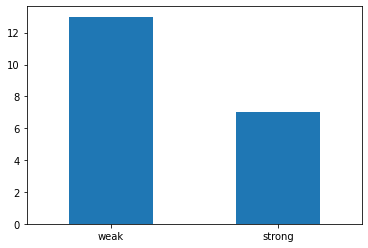

In [22]:
prob_3['AP'].value_counts().plot.bar(rot = 0)

(8) 홈 무승부와 원정 무승부 기록을 한 번에 제거하시오.

In [23]:
prob_3.drop(columns = ['HD', 'AD'])

,Team,HW,HL,HGF,HGA,AW,AL,AGF,AGA,HP,AP,Score,GF,GA,GDIFF
6,Leicester City,12,1,35,18,11,2,33,18,strong,strong,81,68,36,32
0,Arsenal,12,3,31,11,8,4,34,25,strong,strong,71,65,36,29
16,Tottenham Hotspur,10,3,35,15,9,3,34,20,strong,strong,70,69,35,34
8,Manchester City,12,5,47,21,7,5,24,20,strong,strong,66,71,41,30
9,Manchester United,12,2,27,9,7,8,22,26,strong,weak,66,49,35,14
12,Southampton,11,5,39,22,7,6,20,19,strong,strong,63,59,41,18
19,West Ham United,9,3,34,26,7,5,31,25,strong,strong,62,65,51,14
7,Liverpool,8,3,33,22,8,7,30,28,strong,strong,60,63,50,13
13,Stoke City,8,7,22,24,6,8,19,31,strong,weak,51,41,55,-14
3,Chelsea,5,5,32,30,7,7,27,23,weak,weak,50,59,53,6


(9) 모든 팀은 승점에 따라 세 그룹으로 나뉜다. 승점이 상위 30% 에 속하면 A 그룹, 하위 30% 에 속하면 C 그룹, 나머지 팀들은 B 그룹이다. 파생변수 Group 을 만들어 각 팀이 속한 그룹을 배정하시오.

In [24]:
A = prob_3['Score'].quantile(0.7)
B = prob_3['Score'].quantile(0.3)
prob_3['Group'] = np.where(prob_3['Score'] > A, 'A', np.where(prob_3['Score'] > B, 'B', 'C'))

(10) 모든 팀은 속한 그룹에 따라 상금을 받는다. 두 변수 Group, Prize 를 갖는 데이터프레임을 생성하시오. (A그룹: 1000, B그룹: 500, C그룹: 100)

In [25]:
data = pd.DataFrame({'Group' : ['A', 'B', 'C'],
                     'Prize' : [1000, 500, 100]})

(11) 시즌기록 데이터에 (10) 에서 생성한 데이터프레임을 가로로 결합함으로써 상금 정보를 추가하시오.

In [26]:
prob_3 = pd.merge(prob_3, data, how = 'left', on = 'Group')